https://www.cnblogs.com/endlesscoding/p/10033527.html

https://www.cnblogs.com/endlesscoding/p/10058532.html

In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab

%matplotlib inline

In [358]:
def ToDiagonalMatrix(arr):
    num = len(arr)
    m = np.zeros((num, num))
    for i in range(num):
        m[i, i] = arr[i]
    return m

def SqrtDiagonalMatrix(diagonalM, epsilon = 1e-8):
    size = diagonalM.shape
    m = np.copy(diagonalM)
    for i in range(min(size[0], size[1])):
        if (m[i, i] >= epsilon):
            m[i, i] = np.sqrt(m[i, i])
        else:
            m[i, i] = 0
    return m

#np.linalg.inv
def InverseDiagonalMatrix(diagonalM, epsilon = 1e-8):
    size = diagonalM.shape
    m = np.copy(diagonalM)
    for i in range(min(size[0], size[1])):
        if (m[i, i] >= epsilon):
            m[i, i] = 1 / m[i, i]
        else:
            m[i, i] = 0
    return m

#np.linalg.inv
def ReshapeDiagonalMatrix(diagonalM, shape, epsilon = 1e-8):
    size = diagonalM.shape
    m = np.zeros(shape)
    for i in range(min(size[0], size[1])):
        if (diagonalM[i, i] >= epsilon):
            m[i, i] = diagonalM[i, i]
    return m

def GetDiagonalMatrixMinValue(diagonalM, percent = 1.0):
    size = diagonalM.shape
    minSize = min(size[0], size[1])
    arr = np.zeros((minSize,))
    totalValue = 0
    for i in range(minSize):
        totalValue += diagonalM[i, i]
        arr[i] = diagonalM[i, i]
    arr = -np.sort(-arr, axis=0, kind='quicksort', order=None)
    totalValue *= percent
    for i in range(minSize):
        totalValue -= arr[i] 
        if totalValue <= 0:
            print("drop number percent: " + str((minSize - i) * 1.0 / minSize))
            return arr[i]
    print("drop number percent: 0")
    return 0

def CompressBySystemSVD(A, singularPercent = 1.0):
    U,S,VT = np.linalg.svd(A)
    S = ToDiagonalMatrix(S)
    minValidSingularValue = GetDiagonalMatrixMinValue(S, singularPercent)
    S = ReshapeDiagonalMatrix(S, (U.shape[1], VT.shape[0]), minValidSingularValue)
    return U@S@VT

def CompressBySVD(A, singularPercent = 1.0):
    A = A * 1.0 # necessary: int convert to float
    AT_A = np.matmul(A.T, A)
    arrLambda, matEigenVertor = np.linalg.eig(AT_A)
    matLambda = ToDiagonalMatrix(arrLambda) 
    matSingular = SqrtDiagonalMatrix(matLambda)
    minValidSingularValue = GetDiagonalMatrixMinValue(matSingular, singularPercent)
    invMatSingular = InverseDiagonalMatrix(matSingular)
    V = matEigenVertor
    U = A@V@invMatSingular
    S = ReshapeDiagonalMatrix(matSingular, (U.shape[1], V.T.shape[0]), minValidSingularValue)
    return U@S@V.T

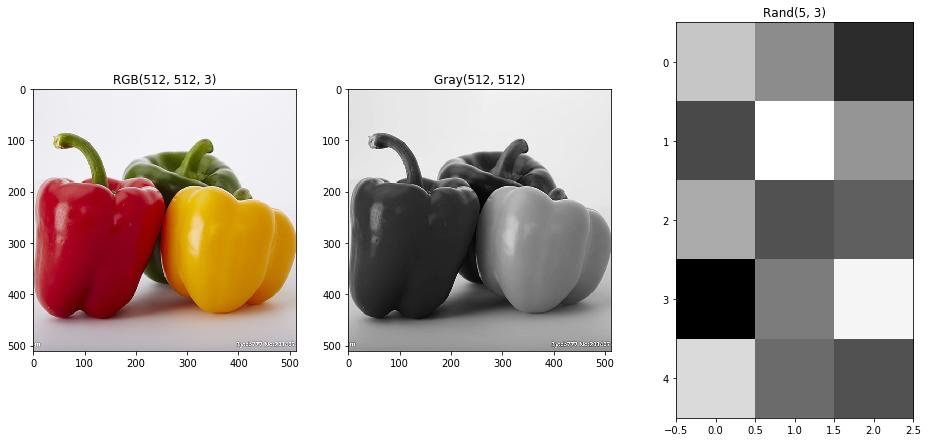

In [348]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

rgb = np.array(plt.imread("images/RGB.bmp"))
rgb[0] = rgb[0] * 1.0# necessary: int convert to float
rgb[1] = rgb[1] * 1.0# necessary: int convert to float
rgb[2] = rgb[2] * 1.0# necessary: int convert to float
plt.subplot(2, 3, 1)
plt.title("RGB" + str(rgb.shape))
plt.imshow(rgb)

gray = np.array(plt.imread("images/Gray.bmp")) * 1.0 # necessary: int convert to float
plt.subplot(2, 3, 2)
plt.title("Gray" + str(gray.shape))
plt.imshow(gray, cmap=plt.cm.gray)

np.random.seed(123456)
rand = np.random.randn(5, 3) * 1.0 # necessary: int convert to float
plt.subplot(2, 3, 3)
plt.title("Rand" + str(rand.shape))
plt.imshow(rand, cmap=plt.cm.gray)

plt.show()

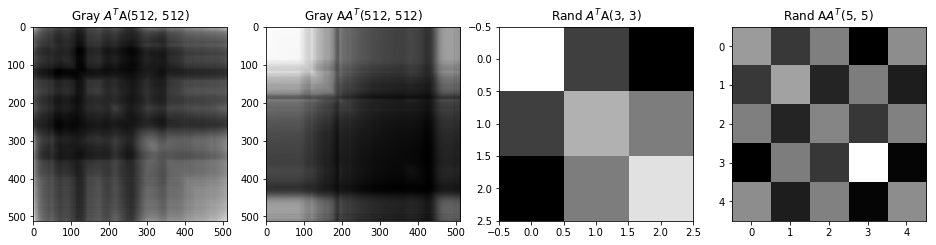

In [349]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

gray_AT_A = np.matmul(gray.T, gray)
plt.subplot(2, 4, 1)
plt.title("Gray $A^{T}$A" + str(gray_AT_A.shape))
plt.imshow(gray_AT_A, cmap=plt.cm.gray)

gray_A_AT = np.matmul(gray, gray.T)
plt.subplot(2, 4, 2)
plt.title("Gray A$A^{T}$" + str(gray_A_AT.shape))
plt.imshow(gray_A_AT, cmap=plt.cm.gray)

rand_AT_A = np.matmul(rand.T, rand)
plt.subplot(2, 4, 3)
plt.title("Rand $A^{T}$A" + str(rand_AT_A.shape))
plt.imshow(rand_AT_A, cmap=plt.cm.gray)

rand_A_AT = np.matmul(rand, rand.T)
plt.subplot(2, 4, 4)
plt.title("Rand A$A^{T}$" + str(rand_A_AT.shape))
plt.imshow(rand_A_AT, cmap=plt.cm.gray)

plt.show()

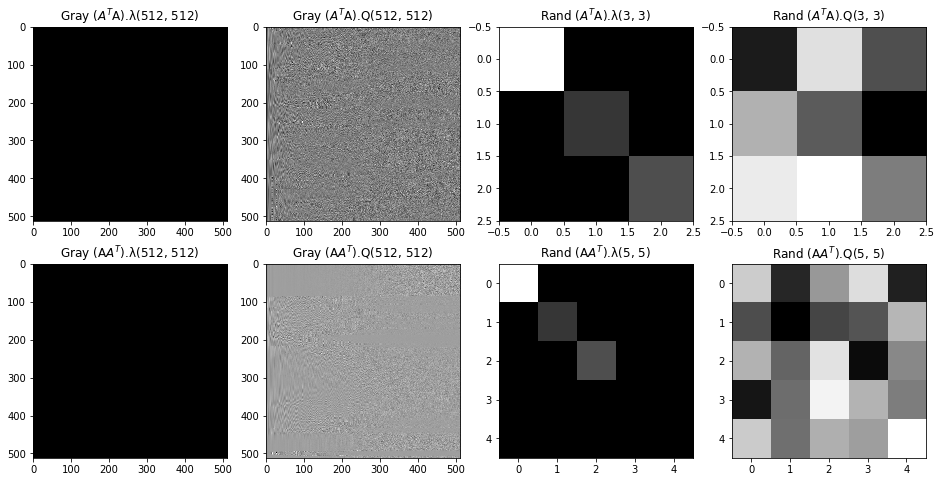

In [350]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # 显示大小

gray_AT_A_Eig = np.linalg.eig(gray_AT_A)   #np.linalg.eig return [eigen values, eigen vectors]
rand_AT_A_Eig = np.linalg.eig(rand_AT_A)   #np.linalg.eig return [eigen values, eigen vectors]

gray_AT_A_lambdaM = ToDiagonalMatrix(gray_AT_A_Eig[0]) 
plt.subplot(2, 4, 1)
plt.title("Gray ($A^{T}$A).λ" + str(gray_AT_A_lambdaM.shape))
plt.imshow(gray_AT_A_lambdaM, cmap=plt.cm.gray)

gray_AT_A_Q = gray_AT_A_Eig[1]
plt.subplot(2, 4, 2)
plt.title("Gray ($A^{T}$A).Q" + str(gray_AT_A_Q.shape))
plt.imshow(gray_AT_A_Q, cmap=plt.cm.gray)

rand_AT_A_lambdaM = ToDiagonalMatrix(rand_AT_A_Eig[0])
plt.subplot(2, 4, 3)
plt.title("Rand ($A^{T}$A).λ" + str(rand_AT_A_lambdaM.shape))
plt.imshow(rand_AT_A_lambdaM, cmap=plt.cm.gray)

rand_AT_A_Q = rand_AT_A_Eig[1]
plt.subplot(2, 4, 4)
plt.title("Rand ($A^{T}$A).Q" + str(rand_AT_A_Q.shape))
plt.imshow(rand_AT_A_Q, cmap=plt.cm.gray)

gray_A_AT_Eig = np.linalg.eig(gray_A_AT)   #np.linalg.eig return [eigen values, eigen vectors]
rand_A_AT_Eig = np.linalg.eig(rand_A_AT)   #np.linalg.eig return [eigen values, eigen vectors]

gray_A_AT_lambdaM = ToDiagonalMatrix(gray_A_AT_Eig[0]) 
plt.subplot(2, 4, 5)
plt.title("Gray (A$A^{T}$).λ" + str(gray_A_AT_lambdaM.shape))
plt.imshow(gray_A_AT_lambdaM, cmap=plt.cm.gray)

gray_A_AT_Q = gray_A_AT_Eig[1]
plt.subplot(2, 4, 6)
plt.title("Gray (A$A^{T}$).Q" + str(gray_A_AT_Q.shape))
plt.imshow(gray_A_AT_Q, cmap=plt.cm.gray)

rand_A_AT_lambdaM = ToDiagonalMatrix(rand_A_AT_Eig[0])
plt.subplot(2, 4, 7)
plt.title("Rand (A$A^{T}$).λ" + str(rand_A_AT_lambdaM.shape))
plt.imshow(rand_A_AT_lambdaM, cmap=plt.cm.gray)

rand_A_AT_Q = rand_A_AT_Eig[1]
plt.subplot(2, 4, 8)
plt.title("Rand (A$A^{T}$).Q" + str(rand_A_AT_Q.shape))
plt.imshow(rand_A_AT_Q, cmap=plt.cm.gray)

plt.show()

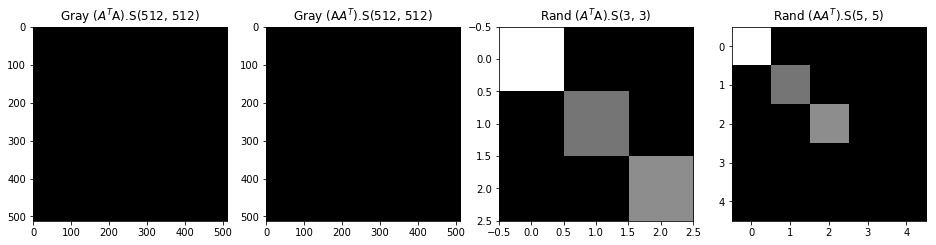

In [351]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # 显示大小

gray_AT_A_SingularM = SqrtDiagonalMatrix(gray_AT_A_lambdaM)
rand_AT_A_SingularM = SqrtDiagonalMatrix(rand_AT_A_lambdaM)

plt.subplot(2, 4, 1)
plt.title("Gray ($A^{T}$A).S" + str(gray_AT_A_SingularM.shape))
plt.imshow(gray_AT_A_SingularM, cmap=plt.cm.gray)

plt.subplot(2, 4, 3)
plt.title("Rand ($A^{T}$A).S" + str(rand_AT_A_SingularM.shape))
plt.imshow(rand_AT_A_SingularM, cmap=plt.cm.gray)

gray_A_AT_SingularM = SqrtDiagonalMatrix(gray_A_AT_lambdaM)
rand_A_AT_SingularM = SqrtDiagonalMatrix(rand_A_AT_lambdaM)

plt.subplot(2, 4, 2)
plt.title("Gray (A$A^{T}$).S" + str(gray_A_AT_SingularM.shape))
plt.imshow(gray_A_AT_SingularM, cmap=plt.cm.gray)

plt.subplot(2, 4, 4)
plt.title("Rand (A$A^{T}$).S" + str(rand_A_AT_SingularM.shape))
plt.imshow(rand_A_AT_SingularM, cmap=plt.cm.gray)

plt.show()

drop number percent: 0
drop number percent: 0.001953125
drop number percent: 0.3333333333333333
drop number percent: 0.3333333333333333
drop number percent: 0.8515625
drop number percent: 0.8515625
drop number percent: 0.3333333333333333
drop number percent: 0.3333333333333333
drop number percent: 0.939453125
drop number percent: 0.939453125
drop number percent: 0.3333333333333333
drop number percent: 0.3333333333333333
drop number percent: 0.9765625
drop number percent: 0.9765625
drop number percent: 0.6666666666666666
drop number percent: 0.6666666666666666


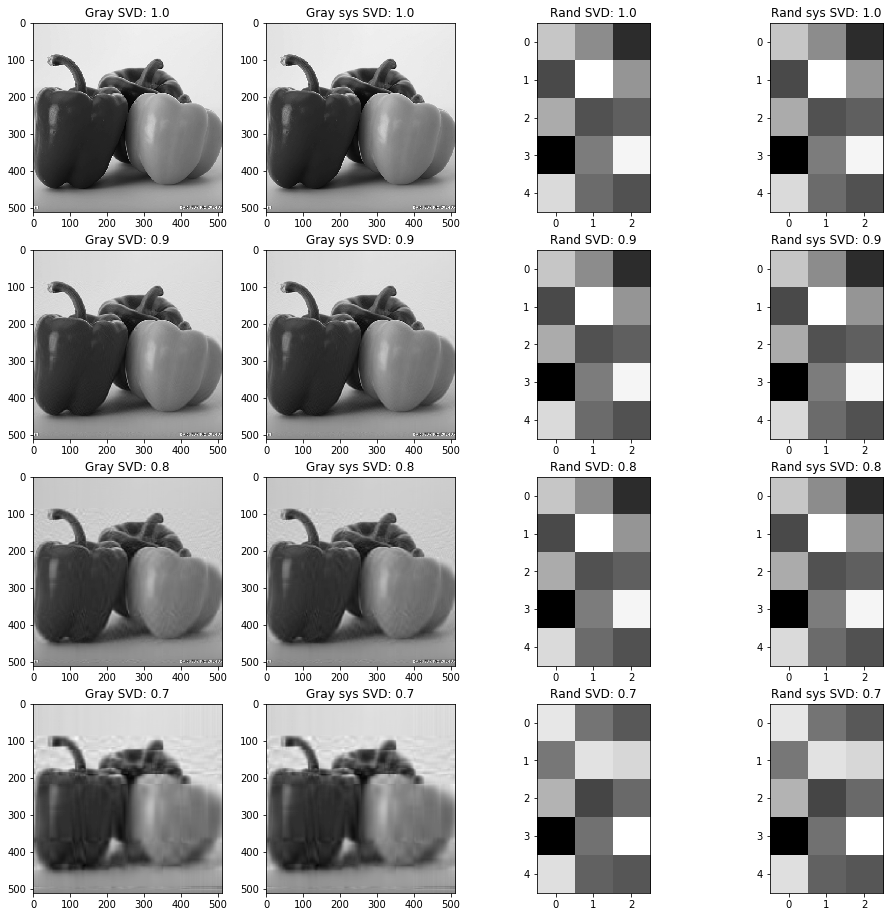

In [359]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

def SubPlotLine(line, singularPercent):
    plt.subplot(4, 4, line * 4 + 1)
    plt.title("Gray SVD: " + str(singularPercent))
    plt.imshow(CompressBySVD(gray, singularPercent), cmap=plt.cm.gray)

    plt.subplot(4, 4, line * 4 + 2)
    plt.title("Gray sys SVD: " + str(singularPercent))
    plt.imshow(CompressBySystemSVD(gray, singularPercent), cmap=plt.cm.gray)

    plt.subplot(4, 4, line * 4 + 3)
    plt.title("Rand SVD: " + str(singularPercent))
    plt.imshow(CompressBySVD(rand, singularPercent), cmap=plt.cm.gray)

    plt.subplot(4, 4, line * 4 + 4)
    plt.title("Rand sys SVD: " + str(singularPercent))
    plt.imshow(CompressBySystemSVD(rand, singularPercent), cmap=plt.cm.gray)

SubPlotLine(0, 1.0)
SubPlotLine(1, 0.9)
SubPlotLine(2, 0.8)
SubPlotLine(3, 0.7)
plt.show()